# This notebook summarizes the evolution code
## It aims to standarize the function definition with standard data output and input

In [1]:
import numpy as np
import random
import math
# from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import pickle
import os
import copy
from concurrent.futures import ProcessPoolExecutor
%autosave 10

Autosaving every 10 seconds


In [92]:
# evolution function definition

class agent6:
    def __init__(self,h1,h2,h3,h4,h5,h6,x=None,y=None):

        self.hop = (h1,h2,h3,h4,h5,h6);
        self.pos = (x,y);
        self.b = resource[x,y]; # resource goes as 0, 1, 2, 3, 4, 5
        self.h = self.hop[int(resource[x,y])]; 

    def updatepos(self,x,y):
        self.pos = (x,y);
        self.b = resource[x,y]; # resource goes as 0, 1, 2, 3, 4, 5
        self.h = self.hop[int(resource[x,y])]; 
        
class agent:
    """
    Agent class encapsulates the information about the position and phenotpye of the agent as well as the agent's current birth and relocation rate.
        
        Parameters:
            h1 to h5 (float): relocation rate or hopping rate of the agent at resource level 1 to 5, which comprises the agent's phenotype
            x, y (int): the x and y coordinate of the agent's location in the 2-dimensional environment
        Functions:
            updatepos(x,y): update the agent's location to (x,y)
    """
    def __init__(self,h1,h2,h3,h4,h5,x=None,y=None):

        self.hop = (h1,h2,h3,h4,h5);
        self.pos = (x,y);
        self.birth = [0,1,2,3,4]
        self.b = self.birth[int(resource[x,y])];  # resource goes as 0, 1, 2, 3, 4
        self.h = self.hop[int(resource[x,y])]; 

    def updatepos(self,x,y):
        self.pos = (x,y);
        self.b = self.birth[int(resource[x,y])]; # resource goes as 0, 1, 2, 3, 4
        self.h = self.hop[int(resource[x,y])];         
        
# def get_num(a,n): # tally agent number at different sites
#     cnt = Counter();
#     for word in [a[i].__dict__['pos'] for i in range(len(a))]:
#         cnt[word] += 1
#     num = [[0 for i in range(n)] for j in range(n)]
#     for i in range(n):
#         for j in range(n):
#             num[i][j] = cnt[(i,j)]
#     return num

def get_num(a,n): 
    """
    Efficiently count agent numbers at all the sites
     
        Parameters: 
            a (list or array): list of agent object;
            n (int): size of the square environment
        Return:
            2-d numpy array: entry at i,j represents the number of agent at location (i,j)
    """
    num=np.zeros((n,n),dtype=int)
    for pos in [a[i].__dict__['pos'] for i in range(len(a))]:
        num[pos]+=1
    return num

def get_num1d(a,n): # tally agent number at different sites 1D
    cnt = Counter();
    for word in [a[i].__dict__['pos'] for i in range(len(a))]:
        cnt[word] += 1
    num = [0 for i in range(n)]
    for i in range(n):
        num[i] = cnt[i]
    return num


def get_i(x,arr,l,r):
    """
    Binary search for the index of an element in a sorted list
        
        Parameters:
            x (float): target to be located for
            arr (list or numpy array): a sorted list where the target will be located at
            l (int): left pointer, usually start with 0
            r (int): right pointer, usually start with len(a)
        Return:
            i (int): index that arr[i]<=x<=arr[i+1]
    """
    if x <= arr[0]:
        return 0
    else:
        while l <= r: 
            mid = l + int((r - l)/2); 
            # Check if x is present at mid 
            if arr[mid] < x and arr[mid+1] >= x: 
                return mid+1 
            # If x is greater, ignore left half 
            elif arr[mid+1] < x: 
                l = mid + 1
            # If x is smaller, ignore right half 
            else: 
                r = mid 
        raise Exception("Target not found")

def uniform_resource6(x,y):
    return np.random.choice([0,1,2,3,4,5], size=(x,y))

def uniform_resource(x,y):
    """Return a uniformly generated 2-dimensional numpy array representing the resource level at each site"""
    return np.random.choice([0,1,2,3,4], size=(x,y))
def uniform_resource1d(x):
    return np.random.choice([0,1,2,3,4], size=x)

def exponetial_resource(x,y):
    p = [np.exp(-i*0.5) for i in range(1,6)]
    p = p/np.sum(p)
    return np.random.choice([0,1,2,3,4],size=(x,y),p=p)
def intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500):  
#     xx = [random.randint(0, n-1) for _ in range(m)]
#     yy = [random.randint(0, n-1) for _ in range(m)]
    a=[(x,y) for x in range(n) for y in range(n)]
    xy=[a[i] for i in random.sample(range(len(a)),m) ]
#     list(zip(np.array(xy).T[0],np.array(xy).T[1]))
#     xy=
    if _type == 'uniform':
        h1 = np.random.uniform(0,hop_high,m) 
        h2 = np.random.uniform(0,hop_high,m) 
        h3 = np.random.uniform(0,hop_high,m) 
        h4 = np.random.uniform(0,hop_high,m)
        h5 = np.random.uniform(0,hop_high,m)
#         h6 = np.random.uniform(0,hop_high,m)
    elif _type == 'step':
        h1 = np.array([hop_high]*m)
        h2 = np.array([hop_high]*m)
        h3 = np.array([hop_high]*m)
        h4 = np.array([hop_high]*m)
        h5 = np.array([0]*m)
        
    return [agent(q,w,e,r,t,k,l) for q,w,e,r,t,k,l in zip(h1,h2,h3,h4,h5,np.array(xy).T[0],np.array(xy).T[1])]

def evolve(total_iteration,  initial_condition,trialnumber, n = 128,noisestd = 0.01, datastoretype=100, 
           initialagentnumber=500, T=0.3,K = 1, hop_high = 10,note=None):
#     count=[0,0,0,0,0] # steps (total number of birth and hop trials), successful birth steps, failed birth, successful hop, failed hop
#     birth_count_yes=[0,0,0,0,0] # successful birth at resource level, 0, 1, 2, 3, 4
#     birth_count_no=[0,0,0,0,0]# failed birth at resource level, 0, 1, 2, 3, 4
#     hop_count_yes=[0,0,0,0,0] # successful hop at resource level, 0, 1, 2, 3, 4
#     hop_count_no=[0,0,0,0,0]# failed hop at resource level, 0, 1, 2, 3, 4
#     n = 128; # number of sites on 1D
    m = initialagentnumber; # number of initial agents
    _path = './evolve_data'+'/{}'.format(time.strftime("%Y_%m_%d_%H_%M",time.localtime()))+'/trial_{}'.format(trialnumber)
    os.makedirs(_path,exist_ok=True)
    info = {"lattice": "{}*{}".format(n,n), "total_iteartion": total_iteration, "evolve_time": T, "noise":noisestd, "carrying_capacity": K, "initial_angent_number":initialagentnumber, "data_stored_every":datastoretype,"note":note}
    with open(_path+'/simulation_info.txt', "wb") as fp: 
        pickle.dump(info, fp)
    with open(_path+'/resource.txt', "wb") as fp: 
        pickle.dump(resource, fp)
        
    a = copy.deepcopy(initial_condition)
    with open(_path+'/iteration_00', "wb") as fp: 
        pickle.dump(a, fp)
    for iteration in range(total_iteration):
        t = 0
        num = get_num(a,n)
        br = [a[i].b for i in range(len(a))]
        hr = [a[i].h for i in range(len(a))]
        brsum = sum(br)
        w = brsum + sum(hr) # total rates
        
        br_cumsum=np.cumsum(br)
        hr_cumsum=np.cumsum(hr)
        while t < T: 
            
           
            dt = -math.log(random.uniform(0.0,1.0)) / w
            t = t + dt
            r = w * random.uniform(0.0,1.0)

            if r < brsum:
                 # birth
#                 tot = np.sum(num);
#                 if tot == K * n * n:
#                     break

                i = get_i(r,br_cumsum,0,len(a)-1);
#                 hop = [0,0];
                hh = random.randint(1, 4);# randchoice
                if hh == 1:
                    hop = [1,0];
                elif hh == 2:
                    hop = [0,1];
                elif hh == 3:
                    hop = [-1,0];
                else:
                    hop = [0,-1];

                if a[i].pos[0]+hop[0] == n:
                    hop[0] = -(n-1);
                elif a[i].pos[0]+hop[0] == -1:
                    hop[0] = n-1;
                elif a[i].pos[1]+hop[1] == n:
                    hop[1] = -(n-1);
                elif a[i].pos[1]+hop[1] == -1:
                    hop[1] = n-1;

                if num[a[i].pos[0]+hop[0]][a[i].pos[1]+hop[1]] < K:
#                     count[1]+=1
#                     birth_count_yes[int(a[i].b)]+=1
    #             if num[a[i].pos[0]][a[i].pos[1]] < K: # for local birth
    #                 print('birth ');
#                     print(tot)
                    noise1 = np.random.normal(0, noisestd, 1)[0];
                    noise2 = np.random.normal(0, noisestd, 1)[0];
                    noise3 = np.random.normal(0, noisestd, 1)[0];
                    noise4 = np.random.normal(0, noisestd, 1)[0];
                    noise5 = np.random.normal(0, noisestd, 1)[0];
#                     noise6 = np.random.normal(0, noisestd, 1)[0];
                    
                    if a[i].hop[0]+noise1 > hop_high:
                        noise1 = hop_high - a[i].hop[0];
                    elif a[i].hop[0]+noise1 < 0:
                        noise1 = -a[i].hop[0]; 
                        
                    if a[i].hop[1]+noise2 < 0:
                        noise2 = -a[i].hop[1];
                    elif a[i].hop[1]+noise2 >  hop_high:
                        noise2 =  hop_high - a[i].hop[1];
                        
                    if a[i].hop[2]+noise3 < 0:
                        noise3 = -a[i].hop[2];
                    elif a[i].hop[2]+noise3 >  hop_high:
                        noise3 =  hop_high - a[i].hop[2];
                        
                    if a[i].hop[3]+noise4 < 0:
                        noise4 = -a[i].hop[3];
                    elif a[i].hop[3]+noise4 >  hop_high:
                        noise4 =  hop_high - a[i].hop[3];
                        
                    if a[i].hop[4]+noise5 < 0:
                        noise5 = -a[i].hop[4];
                    elif a[i].hop[4]+noise5 >  hop_high:
                        noise5 =  hop_high - a[i].hop[4];
                        
#                     if a[i].hop[5]+noise6 < 0:
#                         noise6 = -a[i].hop[5];
#                     elif a[i].hop[5]+noise6 >  hop_high:
#                         noise6 =  hop_high - a[i].hop[5];
                        
                    a.append(agent(a[i].hop[0]+noise1,a[i].hop[1]+noise2,a[i].hop[2]+noise3,a[i].hop[3]+noise4,a[i].hop[4]+noise5,a[i].pos[0]+hop[0],a[i].pos[1]+hop[1]))                     
                    num[a[i].pos[0]+hop[0]][a[i].pos[1]+hop[1]] +=1
                    br.append(a[-1].b)
                    hr.append(a[-1].h)
                    brsum+=a[-1].b
                    w+=a[-1].b+a[-1].h
                    br_cumsum=np.append(br_cumsum,a[-1].b+br_cumsum[-1])
                    hr_cumsum=np.append(hr_cumsum,a[-1].h+hr_cumsum[-1])
                    
    
            else:
                # hopping
                i = get_i(r,brsum+hr_cumsum,0,len(a)-1);

                hd = random.randint(1, 4);# randchoice
                if hd == 1:
                    hop = [1,0];
                elif hd == 2:
                    hop = [0,1];
                elif hd == 3:
                    hop = [-1,0];
                else:
                    hop = [0,-1];

                if a[i].pos[0]+hop[0] == n:
                    hop[0] = -(n-1);
                elif a[i].pos[0]+hop[0] == -1:
                    hop[0] = n-1;
                elif a[i].pos[1]+hop[1] == n:
                    hop[1] = -(n-1);
                elif a[i].pos[1]+hop[1] == -1:
                    hop[1] = n-1;

                if num[a[i].pos[0]+hop[0]][a[i].pos[1]+hop[1]] < K:
                    num[a[i].pos[0]+hop[0]][a[i].pos[1]+hop[1]]+=1
                    num[a[i].pos[0]][a[i].pos[1]]-=1
                    a[i].updatepos(a[i].pos[0]+hop[0],a[i].pos[1]+hop[1])
                    brsum+=a[i].b-br[i]
                    w+=a[i].b-br[i]+a[i].h-hr[i]
                    br_cumsum[i:]+=a[i].b-br[i]
                    hr_cumsum[i:]+=a[i].h-hr[i]
                    br[i]=a[i].b
                    hr[i]=a[i].h
#             br_new = [a[i].b for i in range(len(a))]
#             hr_new = [a[i].h for i in range(len(a))]  
#             if not(np.allclose(br,br_new) and np.allclose(hr,hr_new)): # test if the modifed code generate same cumsum array, there's a rounding error for hr_cumsum
#                 print('not equal')
# #                 break
#                 return (hr_new,hr)
#             print(hr_cumsum==np.cumsum(hr))
#             print(br_cumsum==np.cumsum(br))
#          
#                 else:
#                     count[4] +=1
#                     hop_count_no[int(a[i].b)]+=1
        # remove high resource agents
#         poss = [a[j].pos for j in range(len(a))] # position tuple list
#         indextopop = [j for j in range(len(a)) if (poss[j][0]+poss[j][1]) % 2 == 1] # select the index to delete
#         aa = [a[i] for i in indextopop] # create new object list
#         a = aa
        if len(a) > m:
#             print(len(a))
            reset = random.sample(range(len(a)), m) # randomly generate m agents to keep for the next iteration
            a = [a[i] for i in reset]
            
        if iteration%datastoretype == 0:
            with open(_path+'/iteration_{}'.format(iteration), "wb") as fp: 
                pickle.dump(a, fp)
        
    return a;


In [13]:
# data visualization function

def plotsingleviolin(data): # make violion plot for a single trail data
#     a =results2d128128cc1copies20with2000catast_nonoise[0].result()
    hop = np.zeros((5,500))
    for j in range(5):
        hop[j] = [data[i].__dict__['hop'][j] for i in range(len(data))]
    df = pd.DataFrame(hop.T,columns=(r'$S_1$',r'$S_2$',r'$S_3$',r'$S_4$',r'$S_5$'))
    fig, ax1 = plt.subplots()

    fsize = 12
    color = 'k'
    ax1.set_xlabel("Resource Level",fontsize = fsize)
    ax1.set_ylabel("Hopping Rate Distribution",color=color,fontsize = fsize)
    ax1.plot(df.median(),color=color,label='Simulated')

    sns.violinplot(data=df,scale='area',inner='box',cut=0, figsize=(20,20))
    #     plt.ylim(-0.5,10.5)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_aspect(1/ax1.get_data_ratio())
    # ax1.set_ylim(-1.5,11.5)
    color = 'b'
    ax2 = fig.add_axes(ax1.get_position())
    ax2.set_facecolor("None")
    ax2.set_aspect('equal')
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(ax1.get_ylim())
    # ax2.plot([5,0],[0,2], color="red")
    #     ax2.plot(range(5),[10-10*(1-x)**4 for x in [4/5-b/5 for b in range(5)]],'--', color=color,label='Predicted')
    ax2.set_aspect(1/ax2.get_data_ratio())
    ax2.set_ylabel('Predicted Hopping Rate', color=color,fontsize = fsize)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.tick_params(bottom=0, top=0, left=0, right=1, 
                    labelbottom=0, labeltop=0, labelleft=0, labelright=1,labelcolor=color)
    
def plotcopiesvariability(copy,title,alldata=None,foodata=None): #multi trails median plot
    if foodata!=None:    
        alldata = [foodata[i].result() for i in range(copy)];
    boxdata=[np.median(np.array([alldata[j][i].hop for i in range(500)]),axis=0) for j in range(copy)]
    for j in range(copy):
        plt.plot(range(1,6),boxdata[j])
    plt.xticks(np.arange(1,6), ('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'),fontsize= 15)
    plt.ylabel('Relocation Rate',fontsize= 15)
    plt.xlabel('Phenotype component',fontsize= 15)
    plt.yticks(fontsize=15)
    plt.plot(range(1,6),[10-10*(x)**4 for x in [b/5 for b in range(1,6)]],'--',label='Predicted')
    plt.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),frameon=False,fontsize=15)
    fig = plt.gcf()
    fig.set_size_inches(6.5, 6.5)
    plt.title(title,fontsize= 15)
#     plt.savefig('{} catastrophes.pdf'.format(catastrophes))
    
def plotcopiesbox(copy,title,alldata=None,foodata=None): #multi trails box plot
    if foodata!=None:    
        alldata = [foodata[i].result() for i in range(copy)];
    boxdata=[np.median(np.array([alldata[j][i].hop for i in range(500)]),axis=0) for j in range(copy)]
    plt.boxplot([np.array(boxdata).T[i,:] for i in range(5)])
    plt.plot(range(1,6),[10-10*(x)**4 for x in [b/5 for b in range(1,6)]],'--',label='Predicted')
    plt.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),frameon=False,fontsize=15)
    plt.xticks(np.arange(1,6), ('$\gamma_1$',r'$\gamma_2$',r'$\gamma_3$',r'$\gamma_4$',r'$\gamma_5$'),fontsize= 15)
    plt.yticks(fontsize=15)
    plt.title(title,fontsize= 15)
    plt.ylabel('Relocation Rate',fontsize= 15)
    plt.xlabel('Phenotype component',fontsize= 15)
    fig = plt.gcf()
    fig.set_size_inches(6.5, 6.5)
#     plt.savefig('{} catastrophes_boxplot.pdf'.format(catastrophes))

In [104]:
# with open('./evolve_data/2021_04_08_14_50/trail_19/resource.txt', "rb") as fp: 
#     resource=pickle.load(fp)
b=intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500)
a=evolve(total_iteration=1,initial_condition=b,trialnumber=0);

In [ ]:
 with ProcessPoolExecutor() as executor:
    test = [executor.submit(evolve,total_iteration=20001,initial_condition=intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500),trialnumber=i,n = 128, noisestd = 0.05, datastoretype=200, 
           initialagentnumber=500, T=0.3,K = 1, hop_high = 10,note='standard parameters (further optimized algorithm) 4rd run: uniform resource initial 500 agents, 5 resource levels, [0,1,2,3,4], 128*128 sites, T=0.3 k=1') for i in range(20)]
# test= evolve(total_iteration=100,initial_condition=intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500),trailnumber=0, noisestd = 0.05, datastoretype=1, 
#            initialagentnumber=500, T=0.002,K = 1, hop_high = 10,note='speed test')
# evolve(10,intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500),0)

In [62]:
with open('./evolve_data/2021_04_08_14_50/trail_19/resource.txt', "rb") as fp: 
    resource=pickle.load(fp)
with ProcessPoolExecutor() as executor:
    test = [executor.submit(evolve,total_iteration=20001,initial_condition=intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500),trialnumber=i,n = 128, noisestd = 0.05, datastoretype=50, 
           initialagentnumber=500, T=0.3,K = 1, hop_high = 10,note='standard parameters (optimized algorithm) 2nd run with more data stored (every 50 iter): uniform resource initial 500 agents, 5 resource levels, [0,1,2,3,4], 128*128 sites, T=0.3 k=1') for i in range(20)]


In [13]:
# multiprocessing

from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    new = [executor.submit(evolve,total_iteration=20001,initial_condition=intialcondtiongenerator(_type = 'uniform',hop_high=10, n=128, m=500),trailnumber=i, noisestd = 0.05, datastoretype=50, 
           initialagentnumber=500, T=0.3,K = 1, hop_high = 10,note='6 resource levels, 0-5, uniform initial condition, noise 0.05, to test how does a new added phenotype component change the optimal phenotype combinations') for i in range(20)]


In [17]:
# continue from above
alldata = [test[i].result() for i in range(20)]
from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    foo3= [executor.submit(evolve,total_iteration=20000,initial_condition=alldata[i],trailnumber=i, noisestd = 0.05, datastoretype=50, 
           initialagentnumber=500, T=0.3,K = 1, hop_high = 10,note='continue after 40000 iterations with noise 0.05 and uniform initial conditions, data stored on 2020_04_18_19_13_53 and 2020_04_22_20_40_08') for i in range(20)]


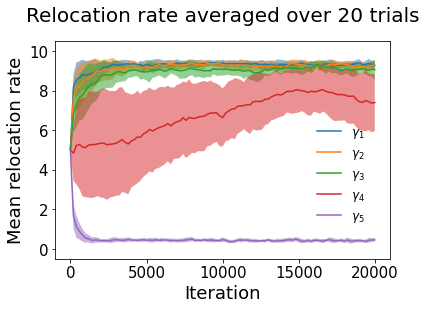

In [82]:
iteration =20001
var=[[] for _ in range(len(range(0,iteration,200)))]
ave=[[] for _ in range(len(range(0,iteration,200)))]
for i in range(0,iteration,200):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
#         with open("./evolve_data/2020_06_17_01_25/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
#             data[j] = pickle.load(fp)
        try:
            with open("./evolve_data/2021_04_12_02_18/trial_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
#     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    var[int(i/200)]=np.var(np.array(boxdata).T,1)
    ave[int(i/200)]=np.average(np.array(boxdata).T,1)
# for i in range(5):    
#     plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
# plt.ylabel('STD of the medians of 20 copies')   
# plt.xlabel('Iterations/50')
# # plt.title('noise 0.05 uniform local birth')
# plt.legend()
# plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,20000,101),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,20000,101),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
         horizontalalignment='center',
         fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
# plt.legend()
# plt.show()
# plt.savefig('./Paper_1_Figures/evo_iteration_density0_ave.pdf')

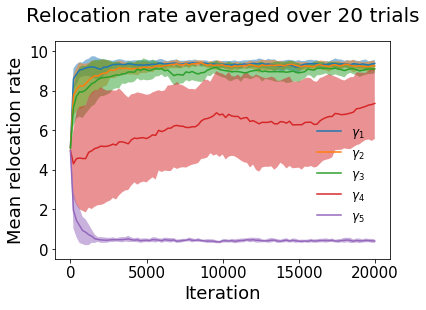

In [111]:
iteration =20001
var=[[] for _ in range(len(range(0,iteration,200)))]
ave=[[] for _ in range(len(range(0,iteration,200)))]
for i in range(0,iteration,200):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
#         with open("./evolve_data/2020_06_17_01_25/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
#             data[j] = pickle.load(fp)
        try:
            with open("./evolve_data/2021_04_09_12_00/trial_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
#     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    var[int(i/200)]=np.var(np.array(boxdata).T,1)
    ave[int(i/200)]=np.average(np.array(boxdata).T,1)
# for i in range(5):    
#     plt.plot(np.sqrt(np.array(var))[:,i],label="component {}".format(i+1))
# plt.ylabel('STD of the medians of 20 copies')   
# plt.xlabel('Iterations/50')
# # plt.title('noise 0.05 uniform local birth')
# plt.legend()
# plt.show()
for i in range(5):    
    plt.plot(np.linspace(0,20000,101),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,20000,101),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
         horizontalalignment='center',
         fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
# plt.legend()
# plt.show()
# plt.savefig('./Paper_1_Figures/evo_iteration_density0_ave.pdf')

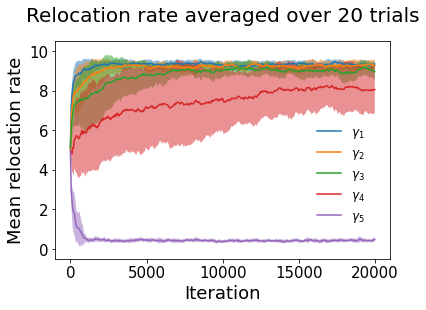

In [109]:
iteration =20001
var=[[] for _ in range(len(range(0,iteration,50)))]
ave=[[] for _ in range(len(range(0,iteration,50)))]
for i in range(0,iteration,50):
    data=[[] for _ in range(20)]

    boxdata=[]
    for j in range(20):
#         with open("./evolve_data/2020_06_17_01_25/trail_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
#             data[j] = pickle.load(fp)
        try:
            with open("./evolve_data/2021_04_08_21_48/trial_{}/iteration_{}".format(j,i), "rb") as fp:   # Unpickling
                data[j] = pickle.load(fp)
        except FileNotFoundError:
            print("trail_{}".format(j)+" doesn\'t have iteration_{}".format(i))
        else:
            boxdata.append(np.average(np.array([data[j][i].hop for i in range(500)]),axis=0))
#     boxdata=[np.median(np.array([data[j][i].hop for i in range(500)]),axis=0) for j in range(20)]
    var[int(i/50)]=np.var(np.array(boxdata).T,1)
    ave[int(i/50)]=np.average(np.array(boxdata).T,1)

for i in range(5):    
    plt.plot(np.linspace(0,20000,401),np.array(ave)[:,i],'-',label="$\gamma_{}$".format(i+1))
    plt.fill_between(np.linspace(0,20000,401),np.array(ave)[:,i]-np.sqrt(np.array(var))[:,i], np.array(ave)[:,i]+np.sqrt(np.array(var))[:,i], alpha=0.5)
plt.ylabel('Mean relocation rate',fontsize = 18)   
plt.xlabel('Iteration',fontsize =18 )
# plt.xticks(fontsize=12)
# plt.title('Relocation rate averaged over 20 trials',fontsize=18)
plt.text(10000, 11.5, 'Relocation rate averaged over 20 trials',
         horizontalalignment='center',
         fontsize=20)
# plt.title('0 1 2 3 4 k =1 32*32 site')
plt.legend(bbox_to_anchor=(0.75, 0.11),frameon=False,fontsize=12)
plt.ylim(-0.5,10.5)
plt.gca().set_xticks([0,5000,10000,15000,20000])
plt.gca().tick_params(axis='x',labelsize=15)
plt.gca().tick_params(axis='y',labelsize=15)
# plt.legend()
# plt.show()
# plt.savefig('./Paper_1_Figures/evo_iteration_density0_ave.pdf')

In [103]:
ave[0][1]

7.488221335168309

In [156]:
with open("./evolve_data/2020_04_12_13_35_31/trail_{}/simulation_info.txt".format(0), "rb") as fp:   # Unpickling
    info = pickle.load(fp)
info

{'lattice': '128*128',
 'total_iteartion': 20,
 'evolve_time': 0.3,
 'noise': 0.01,
 'carrying_capacity': 1,
 'initial_angent_number': 500,
 'data_stored_every': 2,
 'note': 'to test what uniform initial condition converges to with noise 0.01 and how fast does it converge'}

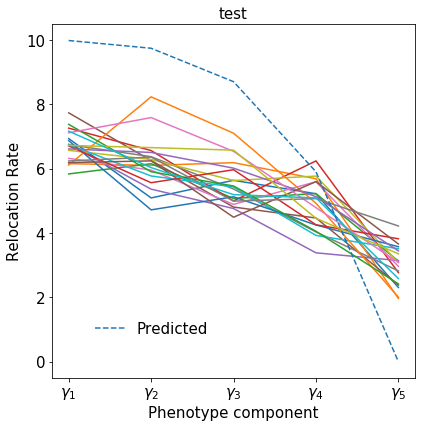

In [157]:
plotcopiesvariability(alldata=None,foodata=foo,copy=20,title="test")

In [8]:
alldata = [foo[i].result() for i in range(20)]

In [11]:
len(alldata[1])

500